In [ ]:
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, TensorBoard
!pip install -U scikit-learn
!pip install scikit-image
!pip install pandas openpyxl
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os
from skimage.util import view_as_windows
from scipy.fft import fftshift, fft2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read data
dir1 = '/content/sample_data/Data'
dir2 = '/content/sample_data/Label'
# dir3 = '/content/sample_data/Feature'
# Generate and sort the list of data files
data_files = sorted([os.path.join(dir1, f) for f in os.listdir(dir1) if f.endswith('.xlsx')])
# Generate and sort the list of label files
label_files = sorted([os.path.join(dir2, f) for f in os.listdir(dir2) if f.endswith('.xlsx')])
# feature_files = sorted([os.path.join(dir3, f) for f in os.listdir(dir3) if f.endswith('.xlsx')])

print(data_files)
print(label_files)
# Original data storage
Tdata_s = []
Tdata_l = []
# feature extraction from real surfaces
Surface_features = []
for i in range(len(data_files)):
    file_path1 = data_files[i]
    file_path2 = label_files[i]
    # Use pandas to read the Excel file
    df1 = pd.read_excel(file_path1,header=None, index_col=None)
    df2 = pd.read_excel(file_path2,header=None, index_col=None)
    # Replace NaN values with the mean of each column
    df1.columns = df1.columns.map(str)  # Convert all column names to strings
    df2.columns = df2.columns.map(str)  # Convert all column names to strings
    # Explicitly attempt to convert numeric columns to float, handling errors silently
    df1 = df1.apply(pd.to_numeric, errors='ignore')
    df2 = df2.apply(pd.to_numeric, errors='ignore')
    # Replace NaN values with the column mean using apply
    df1 = df1.apply(lambda col: col.fillna(col.mean()) if col.dtype == float else col)
    df2 = df2.apply(lambda col: col.fillna(col.mean()) if col.dtype == float else col)
    # Convert the DataFrame to a numpy array and store it in Tdata
    data_array = df1.values
    label_array = df2.values

    Tdata_s.append(data_array)
    Tdata_l.append(label_array)
    Surface_features.append(data_array-label_array)
# Gradients storage
# gradients_data_vertical = []
# gradients_data_horizontal = []
# gradients_labels_vertical = []
# gradients_labels_horizontal = []
# surfName1 = ['mems1-1','mems1-2','mems1-3','IMSlicer12','LZT bump1','MIL_V32','MIL_V63',
#     'MLA_001','MLA_002','frenel_RDS','SiemensStar_AFM1','SiemensStar_AFM2']
# surfName2 = ['mems1-1_Form','mems1-2_Form','mems1-3_Form','IMSlicer12_Form','LZT bump1_Form',
#     'MIL_V32_Form','MIL_V63_Form','MLA_001_Form','MLA_002_Form','frenel_RDS_Form','SiemensStar_AFM1_Form','SiemensStar_AFM2_Form'];

['/content/sample_data/Data/01_HoneyComb2_clean.xlsx', '/content/sample_data/Data/02_Rdiant2_clean.xlsx', '/content/sample_data/Data/03_Lizard Skin2_clean.xlsx', '/content/sample_data/Data/03_Shark Skin2_clean.xlsx', '/content/sample_data/Data/03_Snake Skin2_clean.xlsx', '/content/sample_data/Data/12degree_p1_clean.xlsx', '/content/sample_data/Data/A2_21.xlsx', '/content/sample_data/Data/Block1_clean.xlsx', '/content/sample_data/Data/Block2_clean.xlsx', '/content/sample_data/Data/Block3_clean.xlsx', '/content/sample_data/Data/Block4_clean.xlsx', '/content/sample_data/Data/Block5_clean.xlsx', '/content/sample_data/Data/MIL_V250_clean.xlsx', '/content/sample_data/Data/MIL_V32_clean.xlsx', '/content/sample_data/Data/MIL_V63_clean.xlsx', '/content/sample_data/Data/MLA_001_clean.xlsx', '/content/sample_data/Data/MLA_002_clean.xlsx', '/content/sample_data/Data/SS_0_clean.xlsx', '/content/sample_data/Data/SiemensStar_AFM1_clean.xlsx', '/content/sample_data/Data/SiemensStar_AFM2_clean.xlsx', '

<ipython-input-4-912c7b970455>:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df1 = df1.apply(pd.to_numeric, errors='ignore')
<ipython-input-4-912c7b970455>:29: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df2 = df2.apply(pd.to_numeric, errors='ignore')
<ipython-input-4-912c7b970455>:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df1 = df1.apply(pd.to_numeric, errors='ignore')
<ipython-input-4-912c7b970455>:29: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df2 = df2.apply(pd.to_numeric, errors='ignore')
<ipython-input-4

In [ ]:
# Read data
dir1 = '/content/sample_data/addTest'
# Generate and sort the list of data files
data_files = sorted([os.path.join(dir1, f) for f in os.listdir(dir1) if f.endswith('.xlsx')])
print(data_files)
# Original data storage
TestData = []
for i in range(len(data_files)):
    file_path1 = data_files[i]
    # Use pandas to read the Excel file
    df1 = pd.read_excel(file_path1,header=None, index_col=None)
    # Replace NaN values with the mean of each column
    df1.columns = df1.columns.map(str)  # Convert all column names to strings
    # Explicitly attempt to convert numeric columns to float, handling errors silently
    df1 = df1.apply(pd.to_numeric, errors='ignore')
    # Replace NaN values with the column mean using apply
    df1 = df1.apply(lambda col: col.fillna(col.mean()) if col.dtype == float else col)
    # Convert the DataFrame to a numpy array and store it in Tdata
    data_array = df1.values
    TestData.append(data_array)

['/content/sample_data/addTest/A2_22_FR.xlsx', '/content/sample_data/addTest/CMF Microneedles_clean_FR.xlsx', '/content/sample_data/addTest/K-parallel_1_clean_FR.xlsx', '/content/sample_data/addTest/LZT2_clean_FR.xlsx', '/content/sample_data/addTest/SS_1_clean_FR.xlsx', '/content/sample_data/addTest/V-paralel_1_clean_FR.xlsx', '/content/sample_data/addTest/atomic array_clean_FR.xlsx', '/content/sample_data/addTest/mems1-5_clean_FR.xlsx', '/content/sample_data/addTest/mems2-1_clean_FR.xlsx', '/content/sample_data/addTest/pillar array 1_clean_FR.xlsx', '/content/sample_data/addTest/s-2_clean_FR.xlsx', '/content/sample_data/addTest/steel_FR_clean.xlsx']


<ipython-input-5-49819eb7a397>:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df1 = df1.apply(pd.to_numeric, errors='ignore')
<ipython-input-5-49819eb7a397>:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df1 = df1.apply(pd.to_numeric, errors='ignore')
<ipython-input-5-49819eb7a397>:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df1 = df1.apply(pd.to_numeric, errors='ignore')
<ipython-input-5-49819eb7a397>:15: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df1 = df1.apply(pd.to_numeric, errors='ignore')
<ipython-input-5

In [ ]:
def generate_form(shape, type='planar', gradient_direction='horizontal', order=2):
    """
    Generates a 2D matrix with either a planar or curved form.

    Parameters:
        shape (tuple): The dimensions of the matrix (rows, columns).
        type (str): 'planar', 'polynomial', or 'sinusoidal' to specify the type of form.
        gradient_direction (str): 'horizontal' or 'vertical'; applies to planar forms.
        order (int): The order of the polynomial (2 for quadratic, 3 for cubic); applies to polynomial forms.

    Returns:
        np.array: A 2D numpy array representing the form.
    """
    rows, cols = shape
    if type == 'planar':
        if gradient_direction == 'horizontal':
            return np.tile(np.linspace(0, 1, cols), (rows, 1))
        elif gradient_direction == 'vertical':
            return np.tile(np.linspace(0, 1, rows), (cols, 1)).T
        else:
            return np.ones(shape)  # Default to constant plane

    elif type == 'polynomial':
        x = np.linspace(-1, 1, cols)
        y = np.linspace(-1, 1, rows)
        X, Y = np.meshgrid(x, y)
        if order == 2:
            return X**2 + Y**2
        elif order == 3:
            return X**3 + Y**3
        else:
            return np.ones(shape)  # Default to constant plane if order not specified correctly

    elif type == 'sinusoidal':
        x = np.linspace(-np.pi, np.pi, cols)
        y = np.linspace(-np.pi, np.pi, rows)
        X, Y = np.meshgrid(x, y)
        return np.sin(X) * np.sin(Y)

    else:
        return np.ones(shape)  # Default to a constant plane if type is not specified correctly

planar_horizontal_matrix = generate_form((10, 10), 'planar', 'horizontal')
print(planar_horizontal_matrix)#

planar_horizontal_matrix = generate_form((10, 10), 'planar', 'horizontal')
planar_vertical_matrix = generate_form((10, 10), 'planar', 'vertical')
polynomial_second_order_matrix = generate_form((10, 10), 'polynomial', order=2)
polynomial_third_order_matrix = generate_form((10, 10), 'polynomial', order=3)
sinusoidal_matrix = generate_form((10, 10), 'sinusoidal')

print("Planar Horizontal Matrix:")
print(planar_horizontal_matrix)
print("\nPlanar Vertical Matrix:")
print(planar_vertical_matrix)
print("\nPolynomial Second Order Matrix:")
print(polynomial_second_order_matrix)
print("\nPolynomial Third Order Matrix:")
print(polynomial_third_order_matrix)
print("\nSinusoidal Matrix:")
print(sinusoidal_matrix)

[[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667 0.77777778 0.88888889 1.        ]
 [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
  0.66666667

In [ ]:
# Data proprocessing
import numpy as np
def generate_form(shape, type='planar', gradient_direction='horizontal', order=2):
    """
    Generates a 2D matrix with either a planar or curved form.

    Parameters:
        shape (tuple): The dimensions of the matrix (rows, columns).
        type (str): 'planar', 'polynomial', or 'sinusoidal' to specify the type of form.
        gradient_direction (str): 'horizontal' or 'vertical'; applies to planar forms.
        order (int): The order of the polynomial (2 for quadratic, 3 for cubic); applies to polynomial forms.

    Returns:
        np.array: A 2D numpy array representing the form.
    """
    rows, cols = shape
    if type == 'planar':
        if gradient_direction == 'horizontal':
            return np.tile(np.linspace(0, 1, cols), (rows, 1))
        elif gradient_direction == 'vertical':
            return np.tile(np.linspace(0, 1, rows), (cols, 1)).T
        else:
            return np.ones(shape)  # Default to constant plane

    elif type == 'polynomial':
        x = np.linspace(-1, 1, cols)
        y = np.linspace(-1, 1, rows)
        X, Y = np.meshgrid(x, y)
        if order == 2:
            # Second order polynomial (parabolic)
            return X**2 + Y**2
        elif order == 3:
            # Third order polynomial (cubic)
            return X**3 + Y**3
        else:
            return np.ones(shape)  # Default to constant plane if order not specified correctly

    elif type == 'sinusoidal':
        x = np.linspace(-np.pi, np.pi, cols)
        y = np.linspace(-np.pi, np.pi, rows)
        X, Y = np.meshgrid(x, y)
        return np.sin(X) * np.sin(Y)

    else:
        # Default to a constant plane if type is not specified correctly
        return np.ones(shape)

        import numpy as np

def generate_forms(shape, N, type, gradient_direction, order):
    """
    Generates N 2D matrices, each with either a planar, polynomial, or sinusoidal form.

    Parameters:
        shape (tuple): The dimensions of the matrix (rows, columns).
        N (int): Number of forms to generate.
        type (str): 'planar', 'polynomial', or 'sinusoidal' to specify the type of form.
        gradient_direction (str): 'horizontal' or 'vertical'; applies to planar forms.
        order (int): The order of the polynomial (2 for quadratic, 3 for cubic); applies to polynomial forms.

    Returns:
        list of np.array: A list of 2D numpy arrays, each representing a form.
    """
    forms = []
    rows, cols = shape
    for _ in range(N):
        if type == 'planar':
            if gradient_direction == 'combined':
                horizontal_gradient = np.tile(np.linspace(0, 1, cols), (rows, 1))
                vertical_gradient = np.tile(np.linspace(0, 1, rows), (cols, 1)).T
                form = (horizontal_gradient + vertical_gradient) / 2  # Average both gradients
            else:
                form = np.ones(shape)  # Default to constant plane if direction not specified correctly
        elif type == 'polynomial':
            x = np.linspace(-1, 1, cols)
            y = np.linspace(-1, 1, rows)
            X, Y = np.meshgrid(x, y)
            if order == 2:
                form = X**2 + Y**2
            elif order == 3:
                form = X**3 + Y**3
            else:
                form = np.ones(shape)  # Default to constant plane if order not specified correctly
            # Normalize polynomial forms
            form = (form - np.min(form)) / (np.max(form) - np.min(form))
        elif type == 'sinusoidal':
            x = np.linspace(-np.pi, np.pi, cols)
            y = np.linspace(-np.pi, np.pi, rows)
            X, Y = np.meshgrid(x, y)
            form = np.sin(X) * np.sin(Y)
            # Normalize sinusoidal forms
            form = (form - np.min(form)) / (np.max(form) - np.min(form))
        else:
            form = np.ones(shape)  # Default to a constant plane if type is not specified correctly
        forms.append(form)

    return forms


from scipy.ndimage import zoom

def resize_matrix(matrix, new_shape):
    """
    Resize a given 2D matrix to new dimensions.

    Parameters:
        matrix (np.array): The original matrix to resize.
        new_shape (tuple): The target size (rows, columns).

    Returns:
        np.array: The resized matrix.
    """
    # Calculate zoom factors
    zoom_factor = (new_shape[0] / matrix.shape[0], new_shape[1] / matrix.shape[1])
    resized_matrix = zoom(matrix, zoom_factor, order=1)  # order=1 (bilinear) for smooth resizing

    # Normalize the resized matrix to the range [0, 1]
    normalized_matrix = (resized_matrix - np.min(resized_matrix)) / (np.max(resized_matrix) - np.min(resized_matrix))

    return normalized_matrix

def combine_features(forms, features, method='add', weight=0.5):
    """
    Combines a generated form with structured features to create a new surface dataset.

    Parameters:
        form (np.array): The 2D numpy array representing the generated form.
        features (np.array): The 2D numpy array of structured features.
        method (str): The method of combining the forms ('add', 'multiply', 'weighted').
        weight (float): The weight for the form in weighted average; 1-weight will be for features.

    Returns:
        np.array: A 2D numpy array representing the new combined surface.
    """
    combined_surfs = []
    combined_labels = []
    if method == 'add':
        for i in range(len(forms)):
            for j in range(len(features)):
            # Resize the feature matrix to 500x500
                feature_resized = resize_matrix(features[j], forms[i].shape)
                feature_resized_form = (feature_resized - np.min(feature_resized)) / (np.max(feature_resized) - np.min(feature_resized))
                # Add the resized form to the resized feature matrix
                combined_matrix = forms[i] + feature_resized_form
                combined_surfs.append(combined_matrix)
                combined_labels.append(forms[i])
        return combined_surfs, combined_labels
    elif method == 'multiply':
        return forms * features
    elif method == 'weighted':
        return weight * forms + (1 - weight) * features
    else:
        raise ValueError("Invalid combination method specified. Choose 'add', 'multiply', or 'weighted'.")


def concatenate_datasets(dataset1, dataset2, axis=0):
    """
    Concatenates two datasets along a specified axis.

    Parameters:
        dataset1 (np.array): First dataset to concatenate.
        dataset2 (np.array): Second dataset to concatenate.
        axis (int): Axis along which to concatenate the datasets (0 for vertical, 1 for horizontal).

    Returns:
        np.array: The concatenated dataset.
    """
    # Convert lists to numpy arrays if they are not already
    if isinstance(dataset1, list):
        dataset1 = np.stack(dataset1, axis=0)
    if isinstance(dataset2, list):
        dataset2 = np.stack(dataset2, axis=0)

    if dataset1.shape[axis] != dataset2.shape[axis]:
        raise ValueError("The dimensions along the concatenation axis must match.")

    return np.concatenate((dataset1, dataset2), axis=axis)

In [ ]:
import numpy as np
from scipy.ndimage import zoom

def generate_form(shape, form_type):
    """
    Generates a 2D matrix with either a linear, quadratic, cubic, or sinusoidal form.

    Parameters:
        shape (tuple): The dimensions of the matrix (rows, columns).
        form_type (str): '1', '2', '3', or '4' to specify the type of form.

    Returns:
        np.array: A 2D numpy array representing the form.
    """
    rows, cols = shape
    x = np.linspace(-1, 1, cols)
    y = np.linspace(-1, 1, rows)
    X, Y = np.meshgrid(x, y)

    if form_type == 'planar':
        # Linear Polynomial
        a, b, c = np.random.uniform(-1, 1, 3)  # Random coefficients
        return a + b * X + c * Y

    elif form_type == 'polynomial2':
        # Quadratic Polynomial
        a, b, c, d, e, f = np.random.uniform(-1, 1, 6)  # Random coefficients
        return a + b * X + c * Y + d * X**2 + e * X * Y + f * Y**2

    elif form_type == 'polynomial3':
        # Cubic Polynomial
        a, b, c, d, e, f, g, h, i, j = np.random.uniform(-1, 1, 10)  # Random coefficients
        return (a + b * X + c * Y + d * X**2 + e * X * Y + f * Y**2 +
                g * X**3 + h * X**2 * Y + i * X * Y**2 + j * Y**3)

    elif form_type == 'sinusoidal':
        # Sinusoidal
        freq_x, freq_y = np.random.uniform(0.5, 2.0, 2)  # Random frequencies
        return np.sin(freq_x * X) + np.sin(freq_y * Y)

    else:
        # Default to a constant plane if type is not specified correctly
        return np.ones(shape)

def generate_forms(shape, N, form_type):
    """
    Generates N 2D matrices, each with either a linear, quadratic, cubic, or sinusoidal form.

    Parameters:
        shape (tuple): The dimensions of the matrix (rows, columns).
        N (int): Number of forms to generate.
        form_type (str): '1', '2', '3', or '4' to specify the type of form.
        gradient_direction (str): 'horizontal' or 'vertical'; applies to planar forms.
        order (int): The order of the polynomial (2 for quadratic, 3 for cubic); applies to polynomial forms.

    Returns:
        list of np.array: A list of 2D numpy arrays, each representing a form.
    """
    forms = []
    for _ in range(N):
        form = generate_form(shape, form_type)
        forms.append(form)
    return forms


def resize_matrix(matrix, new_shape):
    """
    Resize a given 2D matrix to new dimensions.

    Parameters:
        matrix (np.array): The original matrix to resize.
        new_shape (tuple): The target size (rows, columns).

    Returns:
        np.array: The resized matrix.
    """
    # Calculate zoom factors
    zoom_factor = (new_shape[0] / matrix.shape[0], new_shape[1] / matrix.shape[1])
    resized_matrix = zoom(matrix, zoom_factor, order=1)  # order=1 (bilinear) for smooth resizing

    # Normalize the resized matrix to the range [0, 1]
    normalized_matrix = (resized_matrix - np.min(resized_matrix)) / (np.max(resized_matrix) - np.min(resized_matrix))

    return normalized_matrix

def combine_features(forms, features, method='add', weight=0.5):
    """
    Combines a generated form with structured features to create a new surface dataset.

    Parameters:
        form (np.array): The 2D numpy array representing the generated form.
        features (np.array): The 2D numpy array of structured features.
        method (str): The method of combining the forms ('add', 'multiply', 'weighted').
        weight (float): The weight for the form in weighted average; 1-weight will be for features.

    Returns:
        np.array: A 2D numpy array representing the new combined surface.
    """
    combined_surfs = []
    combined_labels = []
    if method == 'add':
        for i in range(len(forms)):
            for j in range(len(features)):
            # Resize the feature matrix to 500x500
                feature_resized = resize_matrix(features[j], forms[i].shape)
                feature_resized_form = (feature_resized - np.min(feature_resized)) / (np.max(feature_resized) - np.min(feature_resized))
                # Add the resized form to the resized feature matrix
                combined_matrix = forms[i] + feature_resized_form
                combined_surfs.append(combined_matrix)
                combined_labels.append(forms[i])
        return combined_surfs, combined_labels
    elif method == 'multiply':
        return forms * features
    elif method == 'weighted':
        return weight * forms + (1 - weight) * features
    else:
        raise ValueError("Invalid combination method specified. Choose 'add', 'multiply', or 'weighted'.")


def concatenate_datasets(dataset1, dataset2, axis=0):
    """
    Concatenates two datasets along a specified axis.

    Parameters:
        dataset1 (np.array): First dataset to concatenate.
        dataset2 (np.array): Second dataset to concatenate.
        axis (int): Axis along which to concatenate the datasets (0 for vertical, 1 for horizontal).

    Returns:
        np.array: The concatenated dataset.
    """
    # Convert lists to numpy arrays if they are not already
    if isinstance(dataset1, list):
        dataset1 = np.stack(dataset1, axis=0)
    if isinstance(dataset2, list):
        dataset2 = np.stack(dataset2, axis=0)

    if dataset1.shape[axis] != dataset2.shape[axis]:
        raise ValueError("The dimensions along the concatenation axis must match.")

    return np.concatenate((dataset1, dataset2), axis=axis)

In [ ]:
# generate surface forms
N = 4  # Generate 3 forms
shape = (256, 256)
type1 = 'planar'
forms1 = generate_forms(shape, N, form_type=type1)
type2 = 'polynomial2'
forms2 = generate_forms(shape, N, form_type=type2)
type3 = 'polynomial3'
forms3 = generate_forms(shape, N, form_type=type3)
type4 = 'sinusoidal'
forms4 = generate_forms(shape, N, form_type=type4)

# combine surface forms with features
combined_surface1, combined_labels1 = combine_features(forms1, TestData, method='add')
combined_surface2, combined_labels2 = combine_features(forms2, TestData, method='add')
combined_surface3, combined_labels3 = combine_features(forms3, TestData, method='add')
combined_surface4, combined_labels4 = combine_features(forms4, TestData, method='add')

Tdata_s_resized = []
for i in range(len(TestData)):
    Tdata_s_resized.append(resize_matrix(TestData[i], shape))

# Concatenate vertically
Surfaces1 = combined_surface1
Labels1 = combined_labels1
Surfaces2 = Surfaces1 + combined_surface2
Labels2 = Labels1 + combined_labels2
Surfaces3 = Surfaces2 + combined_surface3
Labels3 = Labels2 + combined_labels3
Surfaces4 = Surfaces3 + combined_surface4
Labels4 = Labels3 + combined_labels4

print(len(Surfaces4))
print(len(Labels4))

# Define your data shapes
shape = (-1, 256, 256, 1)

# Convert lists to numpy arrays and reshape
data_test = np.array(Surfaces4).reshape(shape)
labels_test = np.array(Labels4).reshape(shape)

print(data_test.shape)
print(labels_test.shape)

192
192
(192, 256, 256, 1)
(192, 256, 256, 1)


In [ ]:
files.download('data_test.mat')
files.download('labels_test.mat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Shape of noisy data: (486, 256, 256, 1)


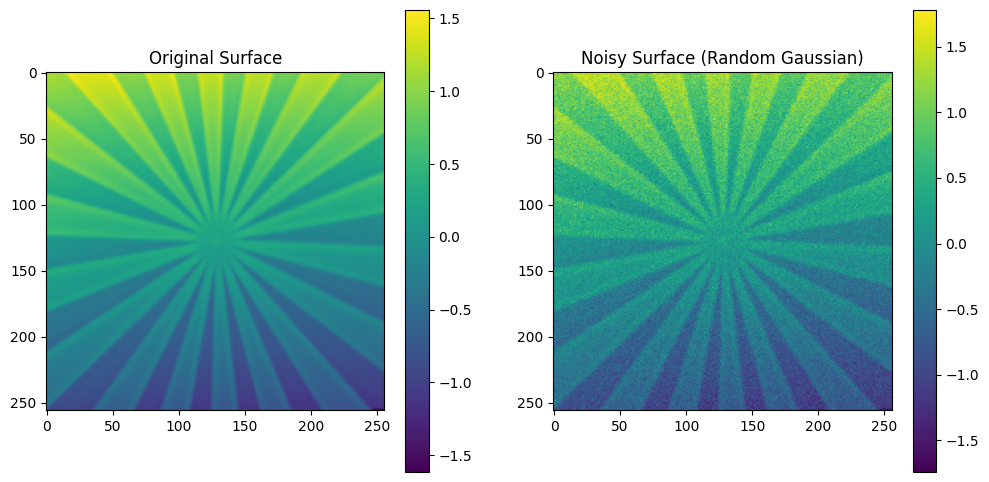

In [ ]:
import numpy as np

# Parameters for Gaussian noise
mean = 0.0  # Mean of the Gaussian noise
std_dev = 0.15  # Standard deviation of the Gaussian noise, adjust as needed

# Create an empty array for the noisy dataset
data_test_noisy = np.empty_like(data_test)

# Add random Gaussian noise to each sample in the dataset
for i in range(data_test.shape[0]):
    # Generate random Gaussian noise for each sample
    noise = np.random.normal(mean, std_dev, data_test[i].shape)
    # Add noise to the sample and store in the noisy dataset
    data_test_noisy[i] = data_test[i] + noise

# Verify the shape of the noisy dataset
print("Shape of noisy data:", data_test_noisy.shape)

# Optional: Check a sample to verify noise addition
import matplotlib.pyplot as plt

# Plot an example of an original surface and the corresponding noisy surface
index = 0  # Choose an index to visualize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Surface")
plt.imshow(data_test[index, :, :, 0], cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Noisy Surface (Random Gaussian)")
plt.imshow(data_test_noisy[index, :, :, 0], cmap='viridis')
plt.colorbar()

plt.show()

In [ ]:
N = 20  # Generate 3 forms
shape = (256, 256)
type1 = 'planar'
forms1 = generate_forms(shape, N, type=type1, gradient_direction ='combined', order=1)
type2 = 'polynomial'
forms2 = generate_forms(shape, N, gradient_direction ='combined', type=type2, order=2)
type3 = 'polynomial'
forms3 = generate_forms(shape, N, gradient_direction ='combined', type=type3, order=3)
type4 = 'sinusoidal'
forms4 = generate_forms(shape, N, gradient_direction ='combined', type=type4, order=1)

TypeError: generate_forms() got an unexpected keyword argument 'type'

In [ ]:
N = 20
shape = (256, 256)
type1 = 'planar'
forms1 = generate_forms(shape, N, form_type=type1)
type2 = 'polynomial2'
forms2 = generate_forms(shape, N, form_type=type2)
type3 = 'polynomial3'
forms3 = generate_forms(shape, N, form_type=type3)
type4 = 'sinusoidal'
forms4 = generate_forms(shape, N, form_type=type4)

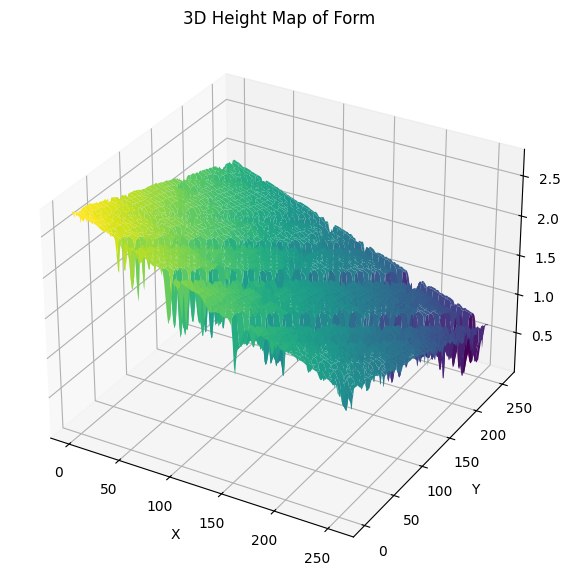

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

matrix1 = data_test[12, :, :, 0]
x = np.arange(matrix1.shape[1])
y = np.arange(matrix1.shape[0])
x, y = np.meshgrid(x, y)
# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(x, y, matrix1, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Height Map of Form')

# Show the plot
plt.show()

df = pd.DataFrame(matrix1)
df.to_excel('form1-0.xlsx', index=False, header=False)
#files.download('form1-0.xlsx')

In [ ]:
# generate surface forms
N = 20  # Generate 3 forms
shape = (256, 256)
type1 = 'planar'
forms1 = generate_forms(shape, N, form_type=type1)
type2 = 'polynomial2'
forms2 = generate_forms(shape, N, form_type=type2)
type3 = 'polynomial3'
forms3 = generate_forms(shape, N, form_type=type3)
type4 = 'sinusoidal'
forms4 = generate_forms(shape, N, form_type=type4)

# combine surface forms with features
combined_surface1, combined_labels1 = combine_features(forms1, Surface_features, method='add')
combined_surface2, combined_labels2 = combine_features(forms2, Surface_features, method='add')
combined_surface3, combined_labels3 = combine_features(forms3, Surface_features, method='add')
combined_surface4, combined_labels4 = combine_features(forms4, Surface_features, method='add')

Tdata_s_resized = []
Tdata_l_resized = []
for i in range(len(Tdata_s)):
    Tdata_s_resized.append(resize_matrix(Tdata_s[i], shape))
    Tdata_l_resized.append(resize_matrix(Tdata_l[i], shape))

# Concatenate vertically
Surfaces1 = Tdata_s_resized + combined_surface1
Labels1 = Tdata_l_resized + combined_labels1
Surfaces2 = Surfaces1 + combined_surface2
Labels2 = Labels1 + combined_labels2
Surfaces3 = Surfaces2 + combined_surface3
Labels3 = Labels2 + combined_labels3
Surfaces4 = Surfaces3 + combined_surface4
Labels4 = Labels3 + combined_labels4

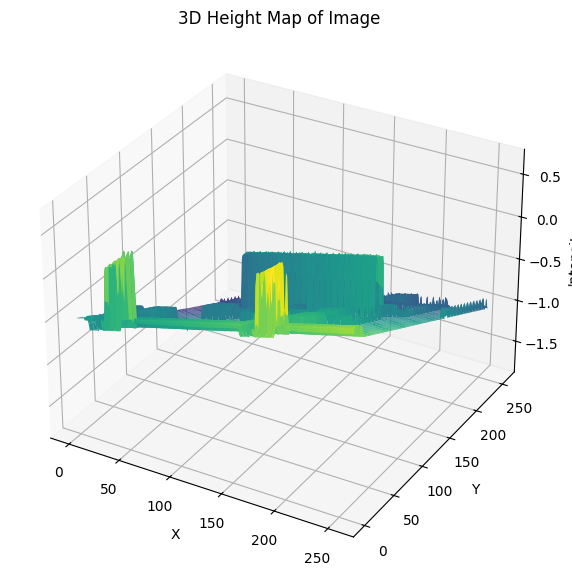

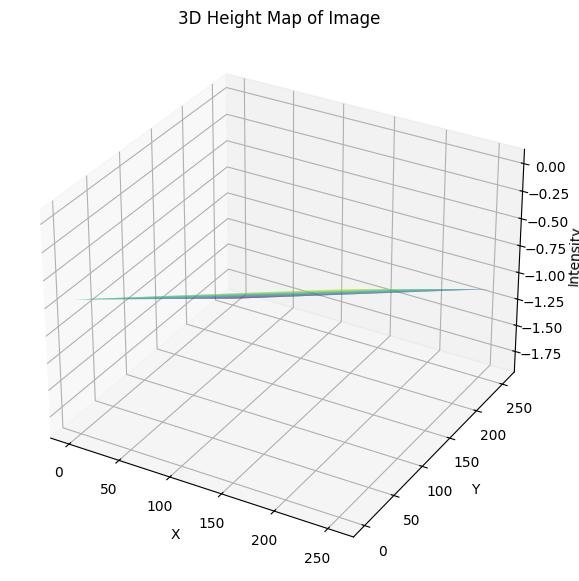

In [ ]:
from re import X
# plot
# image_matrix1 = y_pred[:,:,0]
# image_matrix2 = y_test
# image_matrix3 = x_test - image_matrix2
# Create a meshgrid for the x and y coordinates
# x = np.arange(image_matrix3.shape[1])
# y = np.arange(image_matrix3.shape[0])
n = 57
matrix1 = Surfaces4[n]
matrix2 = Labels4[n]
x = np.arange(matrix1.shape[1])
y = np.arange(matrix1.shape[0])
x, y = np.meshgrid(x, y)
# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(x, y, matrix1, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('3D Height Map of Image')

# Show the plot
plt.show()


# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(x, y, matrix2, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('3D Height Map of Image')

# Show the plot
plt.show()

In [ ]:
import numpy as np

def min_max_normalize(data):
    """
    Normalize data using the Min-Max scaling technique, scaling to the range [0, 1].

    Parameters:
        data (np.array): The input data array to normalize.

    Returns:
        np.array: The normalized data.
    """
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

# Example usage:
data = np.array([10, 20, 30, 40, 50])
normalized_data = min_max_normalize(data)
print("Min-Max Normalized Data:", normalized_data)


Min-Max Normalized Data: [0.   0.25 0.5  0.75 1.  ]


In [ ]:
# split into training, validation and test
# First split: Separate out a test set
data_train_val, data_test, labels_train_val, labels_test = train_test_split(
    Surfaces4, Labels4, test_size=0.2, random_state=42)  # 20% data goes into test set

# Second split: Split the remaining data into training and validation sets
data_train, data_val, labels_train, labels_val = train_test_split(
    data_train_val, labels_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [ ]:
!pip install scipy

import numpy as np
import scipy.io as sio
from google.colab import files

# Define your data shapes
shape = (-1, 256, 256, 1)

# Convert lists to numpy arrays and reshape
data_train = np.array(data_train).reshape(shape)
labels_train = np.array(labels_train).reshape(shape)
data_val = np.array(data_val).reshape(shape)
labels_val = np.array(labels_val).reshape(shape)
data_test = np.array(data_test).reshape(shape)
labels_test = np.array(labels_test).reshape(shape)

# Save test data and labels to .mat files
sio.savemat('data_test.mat', {'data_test': data_test})
sio.savemat('labels_test.mat', {'labels_test': labels_test})

# Download the .mat files
files.download('data_test.mat')
files.download('labels_test.mat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(len(data_train))
print(len(data_val))
print(len(data_test))

1458
486
486


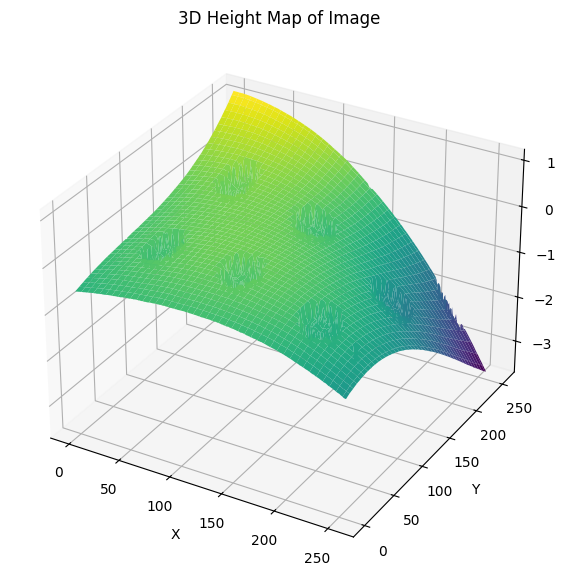

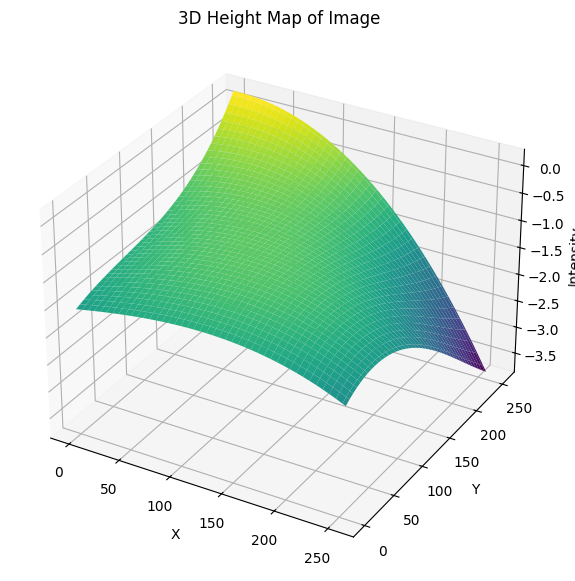

In [ ]:
from re import X
# plot
# image_matrix1 = y_pred[:,:,0]
# image_matrix2 = y_test
# image_matrix3 = x_test - image_matrix2
# Create a meshgrid for the x and y coordinates
# x = np.arange(image_matrix3.shape[1])
# y = np.arange(image_matrix3.shape[0])
n = 130
matrix1 = data_train[n][:,:,0]
matrix2 = labels_train[n][:,:,0]
x = np.arange(matrix2.shape[1])
y = np.arange(matrix1.shape[0])
x, y = np.meshgrid(x, y)
# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(x, y, matrix1, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('3D Height Map of Image')

# Show the plot
plt.show()

# Create the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Plot the surface
ax.plot_surface(x, y, matrix2, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.set_title('3D Height Map of Image')

# Show the plot
plt.show()

In [ ]:
from tensorflow.keras import models, layers, regularizers
import tensorflow as tf

def Resnet_FR_base(input_shape):
    inputs = layers.Input(shape=input_shape)

    # First block with residual connection and larger kernel size for capturing large-scale features
    x = layers.Conv2D(32, (7, 7), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (7, 7), activation='relu', padding='same')(x)
    # Match the channels for residual connection
    shortcut = layers.Conv2D(32, (1, 1), activation='linear', padding='same')(inputs)
    block_1_output = layers.add([x, shortcut])

    # Second block with slightly smaller kernels but still larger than typical to maintain emphasis on low-frequency features
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(block_1_output)
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x)
    # Match the channels for residual connection
    shortcut = layers.Conv2D(64, (1, 1), activation='linear', padding='same')(block_1_output)
    block_2_output = layers.add([x, shortcut])

    # Gradual downsampling to preserve spatial hierarchy
    x = layers.MaxPooling2D((2, 2))(block_2_output)

    # Third block, back to smaller kernels as we're now processing more abstracted features
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

    # Add Dropout for regularization
    x = layers.Dropout(0.2)(x)

    # Additional Conv layers for feature refinement
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    # Prepare output for final residual connection
    x = layers.Conv2D(input_shape[-1], (7, 7), activation='linear', padding='same')(x)

    # If downsampled, need to upsample before adding back to inputs
    x = layers.UpSampling2D(size=(2, 2))(x)

    outputs = layers.add([x, inputs])  # Now adding upsampled x to inputs

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = Resnet_FR_base(input_shape)
# Print model summary to verify its structure
print(model.summary())


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 32)   │          1,600 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 32)   │         50,208 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 32)   │             64 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256, 256, 32)   │              0 │ conv2d_1[0][0],        │
│                           │                        │                │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 64)   │         51,264 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 256, 256, 64)   │        102,464 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 256, 256, 64)   │          2,112 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 256, 256, 64)   │              0 │ conv2d_4[0][0],        │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ add_1[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128, 128, 128)  │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 128, 128, 64)   │         73,792 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 128, 128, 32)   │         18,464 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 128, 128, 1)    │          1,569 │ conv2d_11[0][0]        │
├──────────────────────

 Total params: 569,153 (2.17 MB)

 Trainable params: 569,153 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import tensorflow as tf

def tukey_biweight_loss_with_l1(c, lambda_l1):
    """
    Returns a Tukey's biweight loss function with L1 regularization, parameterized by c and lambda_l1.

    Parameters:
        c (float): The tuning constant which determines the threshold at which
                   the influence of an individual residual is curtailed.
        lambda_l1 (float): The regularization strength for L1 regularization.

    Returns:
        function: A loss function that takes (y_true, y_pred) and computes the
                  Tukey's biweight loss including L1 regularization.
    """
    c = tf.cast(c, dtype=tf.float32)  # Ensure c is float32
    c_squared = tf.square(c)  # Pre-calculate c^2

    def loss(y_true, y_pred):
        # Calculate residuals
        r = y_true - y_pred
        abs_r = tf.abs(r)
        mse = tf.reduce_mean(tf.square(abs_r))
        mae = tf.reduce_mean(abs_r)

        # Calculate the weight for each residual
        condition = abs_r <= c / 6
        left = (c_squared / 6) * (1 - tf.pow(1 - tf.pow(r/c, 2), 3)) * tf.square(abs_r)
        right = tf.ones_like(r) * tf.square(abs_r)

        # Apply condition
        tukey_loss = tf.where(condition, left, right)

        # Combine Tukey's biweight loss with MSE
        combined_loss = 0.8 * mse + 0.2 * tf.reduce_mean(tukey_loss)

        # Calculate gradients of y_pred with respect to inputs or other tensors
        with tf.GradientTape() as tape:
            tape.watch(y_pred)
            # Compute some function of y_pred if necessary; here we assume y_pred itself is the function
            function_of_y_pred = y_pred  # Modify this as needed based on your model context

        gradients = tape.gradient(function_of_y_pred, y_pred)

        # Add L1 regularization term
        l1_penalty = lambda_l1 * tf.reduce_mean(tf.abs(gradients))
        total_loss = combined_loss + l1_penalty

        return total_loss

    return loss


In [ ]:
from tensorflow.keras import models, layers, regularizers
import tensorflow as tf

def ResEDNet_FR_v1(input_shape):
    inputs = layers.Input(shape=input_shape)

    # First block with residual connection and larger kernel size for capturing large-scale features
    x = layers.Conv2D(32, (7, 7), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(inputs)
    x = layers.Conv2D(32, (7, 7), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.3)(x)
    # Match the channels for residual connection
    shortcut = layers.Conv2D(32, (1, 1), activation='linear', padding='same')(inputs)
    block_1_output = layers.add([x, shortcut])

    # Second block with slightly smaller kernels but still larger than typical to maintain emphasis on low-frequency features
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(block_1_output)
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
    #x = layers.BatchNormalization()(x)
    #x = layers.Dropout(0.3)(x)
    # Match the channels for residual connection
    shortcut = layers.Conv2D(64, (1, 1), activation='linear', padding='same')(block_1_output)
    block_2_output = layers.add([x, shortcut])

    # Gradual downsampling to preserve spatial hierarchy
    x = layers.MaxPooling2D((2, 2))(block_2_output)

    # Third block, back to smaller kernels as we're now processing more abstracted features
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
    #x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    # Additional Conv layers for feature refinement
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01))(x)

    # Prepare output for final residual connection
    x = layers.Conv2D(input_shape[-1], (7, 7), activation='linear', padding='same')(x)

    # If downsampled, need to upsample before adding back to inputs
    x = layers.UpSampling2D(size=(2, 2))(x)

    outputs = layers.add([x, inputs])  # Now adding upsampled x to inputs

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = ResEDNet_FR_v1(input_shape)
# Print model summary to verify its structure
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 256, 256, 32)   │          1,600 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_14 (Conv2D)        │ (None, 256, 256, 32)   │         50,208 │ conv2d_13[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_15 (Conv2D)        │ (None, 256, 256, 32)   │             64 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 256, 256, 32)   │              0 │ conv2d_14[0][0],       │
│                           │                        │                │ conv2d_15[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_16 (Conv2D)        │ (None, 256, 256, 64)   │         51,264 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_17 (Conv2D)        │ (None, 256, 256, 64)   │        102,464 │ conv2d_16[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_18 (Conv2D)        │ (None, 256, 256, 64)   │          2,112 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 256, 256, 64)   │              0 │ conv2d_17[0][0],       │
│                           │                        │                │ conv2d_18[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 128, 128, 64)   │              0 │ add_4[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_19[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 128)  │              0 │ conv2d_20[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 128, 128, 64)   │         73,792 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ conv2d_21[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 128, 128, 32)   │         18,464 │ conv2d_22[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ conv2d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)   

 Total params: 569,153 (2.17 MB)

 Trainable params: 569,153 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

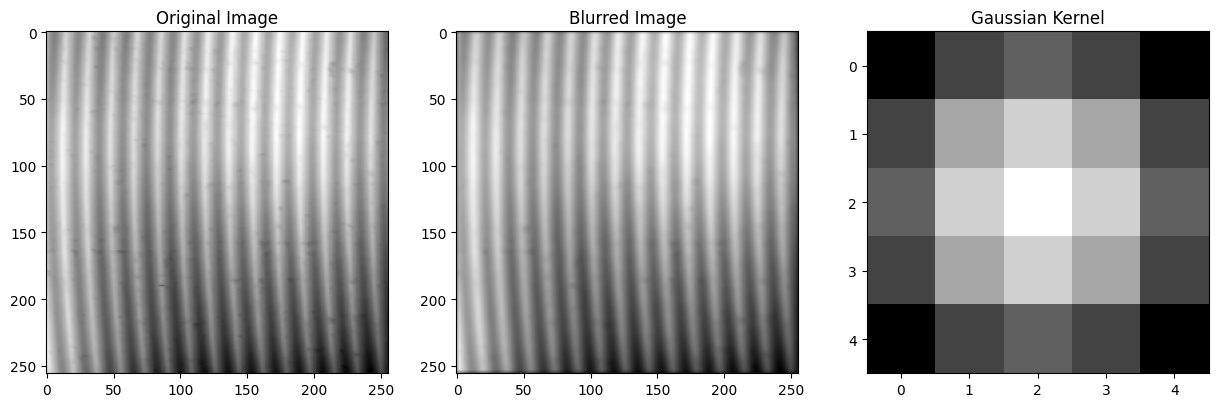

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size=7, sigma=2.0, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        size = self.kernel_size // 2
        gaussian_kernel = gaussian_kernel(size, self.sigma)

        # Adjust the kernel to the number of input channels
        input_channels = int(input_shape[-1])
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_channels, 1])

        self.gaussian_kernel = tf.constant(gaussian_kernel, dtype=tf.float32, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

# Function to visualize the kernel and its effect
def visualize_gaussian_kernel_effect():
    # Create a random test image
    input_image = data_train[647,:,:,:].astype(np.float32)
    input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension
    # Create the Gaussian blur layer
    gaussian_blur_layer = GaussianBlurLayer(kernel_size=5, sigma=2.0)
    gaussian_blur_layer.build(input_image.shape)

    # Apply the Gaussian blur
    blurred_image = gaussian_blur_layer.call(input_image)

    # Convert tensors to numpy arrays for visualization
    input_image_np = input_image[0, :, :, 0]
    blurred_image_np = blurred_image[0, :, :, 0]
    gaussian_kernel_np = gaussian_blur_layer.gaussian_kernel.numpy()[:, :, 0, 0]

    # Plot the results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(input_image_np, cmap='gray')
    axes[0].set_title('Original Image')
    axes[1].imshow(blurred_image_np, cmap='gray')
    axes[1].set_title('Blurred Image')
    axes[2].imshow(gaussian_kernel_np, cmap='gray')
    axes[2].set_title('Gaussian Kernel')
    plt.show()

# Visualize the Gaussian kernel and its effect
visualize_gaussian_kernel_effect()

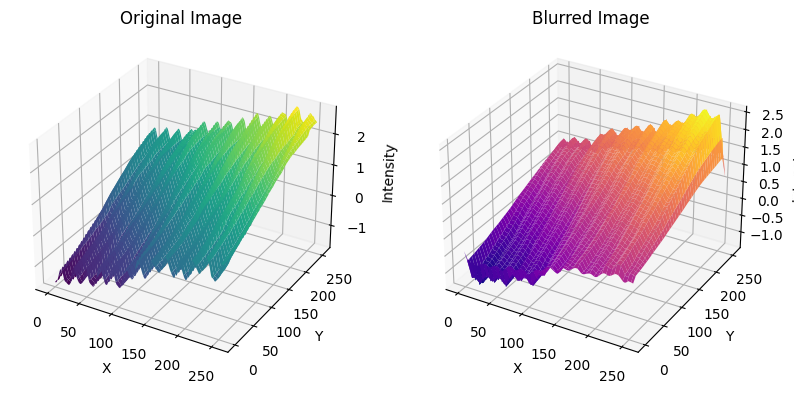

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        size = self.kernel_size // 2
        gaussian_kernel = gaussian_kernel(size, self.sigma)

        # Adjust the kernel to the number of input channels
        input_channels = int(input_shape[-1])
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_channels, 1])

        self.gaussian_kernel = tf.constant(gaussian_kernel, dtype=tf.float32, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

# Function to visualize the kernel and its effect
def visualize_gaussian_kernel_effect():
    # Select a test image from data_test and ensure it's a 4D tensor
    input_image = data_train[27,:,:,:].astype(np.float32)
    input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

    # Create the Gaussian blur layer
    gaussian_blur_layer = GaussianBlurLayer(kernel_size=15, sigma=20.0)
    gaussian_blur_layer.build(input_image.shape)

    # Apply the Gaussian blur
    blurred_image = gaussian_blur_layer.call(input_image)

    # Convert tensors to numpy arrays for visualization
    input_image_np = input_image[0, :, :, 0]
    blurred_image_np = blurred_image[0, :, :, 0]
    gaussian_kernel_np = gaussian_blur_layer.gaussian_kernel.numpy()[:, :, 0, 0]

    # Create meshgrid for 3D plotting
    x = np.arange(input_image_np.shape[1])
    y = np.arange(input_image_np.shape[0])
    x, y = np.meshgrid(x, y)

    # Plot the results
    fig = plt.figure(figsize=(15, 15))

    # Original Image
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(x, y, input_image_np, cmap='viridis')
    ax1.set_title('Original Image')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Intensity')

    # Blurred Image
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(x, y, blurred_image_np, cmap='plasma')
    ax2.set_title('Blurred Image')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Intensity')

    plt.show()

# Visualize the Gaussian kernel and its effect
visualize_gaussian_kernel_effect()

In [ ]:
import tensorflow as tf

def tukey_biweight_loss_with_tv(c, lambda_tv, lambda_large_residuals):
    """
    Returns a refined Tukey's biweight loss function with total variation penalty,
    emphasizing large residuals.

    Parameters:
        c (float): The tuning constant which determines the threshold at which
                   the influence of an individual residual is curtailed.
        lambda_tv (float): The regularization strength for total variation penalty.
        lambda_large_residuals (float): The weight for the large residuals penalty.

    Returns:
        function: A loss function that takes (y_true, y_pred) and computes the
                  combined Tukey's biweight loss with total variation regularization.
    """
    c = tf.cast(c, dtype=tf.float32)  # Ensure c is float32
    c_squared = tf.square(c)  # Pre-calculate c^2

    def loss(y_true, y_pred):
        # Ensure inputs are float32
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)

        # Calculate residuals
        r = y_true - y_pred
        abs_r = tf.abs(r)

        # Calculate the Tukey biweight loss for each residual
        condition = abs_r <= c
        tukey_loss = tf.where(condition,
                              (c_squared / 6) * (1 - tf.pow(1 - tf.pow(r / c, 2), 3)),
                              c_squared / 6)

        # Emphasize large residuals by adding a weighted term for residuals larger than c
        large_residuals_penalty = tf.where(abs_r > c, abs_r - c, 0.0)
        weighted_large_residuals_penalty = lambda_large_residuals * tf.reduce_mean(tf.square(large_residuals_penalty))

        # Calculate the mean of the Tukey biweight loss
        tukey_mean_loss = tf.reduce_mean(tukey_loss)

        # Calculate total variation (TV) penalty
        tv_penalty = lambda_tv * tf.reduce_sum(tf.image.total_variation(y_pred))

        # Total loss with TV penalty and weighted large residuals penalty
        total_loss = tukey_mean_loss + tv_penalty + weighted_large_residuals_penalty

        return total_loss

    return loss

model.compile(optimizer='adam', loss=tukey_biweight_loss_with_tv(c=4.685, lambda_tv=0.01, lambda_large_residuals=0.5))

NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def BlurRes_EDNet_v1(input_shape):
    inputs = layers.Input(shape=input_shape)

    # First block with residual connection and larger kernel size for capturing large-scale features
    x = layers.Conv2D(32, (7, 7), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(32, (7, 7), activation='relu', padding='same')(x)
    # Match the channels for residual connection
    shortcut = layers.Conv2D(32, (1, 1), activation='linear', padding='same')(inputs)
    block_1_output = layers.add([x, shortcut])

    # Second block with slightly smaller kernels but still larger than typical to maintain emphasis on low-frequency features
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(block_1_output)
    x = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(x)
    # Match the channels for residual connection
    shortcut = layers.Conv2D(64, (1, 1), activation='linear', padding='same')(block_1_output)
    block_2_output = layers.add([x, shortcut])

    # Gradual downsampling to preserve spatial hierarchy
    x = layers.MaxPooling2D((2, 2))(block_2_output)

    # Third block, back to smaller kernels as we're now processing more abstracted features
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

    # Add Dropout for regularization
    # x = layers.Dropout(0.2)(x)

    # Additional Conv layers for feature refinement
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    # Prepare output for final residual connection
    x = layers.Conv2D(input_shape[-1], (7, 7), activation='linear', padding='same')(x)

    # If downsampled, need to upsample before adding back to inputs
    x = layers.UpSampling2D(size=(2, 2))(x)

    # Apply Gaussian smoothing
    x = GaussianBlurLayer(kernel_size=3, sigma=1.5)(x)

    outputs = layers.add([x, inputs])  # Now adding upsampled x to inputs

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_EDNet_v1(input_shape)

# Print model summary to verify its structure
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 256, 256, 32)   │          1,600 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 256, 256, 32)   │         50,208 │ conv2d_26[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 256, 256, 32)   │             64 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 256, 256, 32)   │              0 │ conv2d_27[0][0],       │
│                           │                        │                │ conv2d_28[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 256, 256, 64)   │         51,264 │ add_6[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 256, 256, 64)   │        102,464 │ conv2d_29[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 256, 256, 64)   │          2,112 │ add_6[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 256, 256, 64)   │              0 │ conv2d_30[0][0],       │
│                           │                        │                │ conv2d_31[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 128, 128, 64)   │              0 │ add_7[0][0]            │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_33 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_32[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_34 (Conv2D)        │ (None, 128, 128, 64)   │         73,792 │ conv2d_33[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_35 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ conv2d_34[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_36 (Conv2D)        │ (None, 128, 128, 32)   │         18,464 │ conv2d_35[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_37 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ conv2d_36[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_38 (Conv2D)        │ (None, 128, 128, 1)    │          1,569 │ conv2d_37[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_2      

 Total params: 569,153 (2.17 MB)

 Trainable params: 569,153 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def BlurRes_EDNet_v2(input_shape):
    inputs = layers.Input(shape=input_shape)

    # First block with residual connection and larger kernel size for capturing large-scale features
    x = layers.Conv2D(32, (7, 7), padding='same')(inputs)
    x = layers.ReLU()(x)
    x = layers.Conv2D(32, (7, 7), padding='same')(x)
    x = layers.ReLU()(x)
    # Match the channels for residual connection
    shortcut = layers.Conv2D(32, (1, 1), activation='linear', padding='same')(inputs)
    block_1_output = layers.add([x, shortcut])

    # Second block with slightly smaller kernels but still larger than typical to maintain emphasis on low-frequency features
    x = layers.Conv2D(64, (5, 5), padding='same')(block_1_output)
    x = layers.ReLU()(x)
    x = layers.Conv2D(64, (5, 5), padding='same')(x)
    x = layers.ReLU()(x)
    # Match the channels for residual connection
    shortcut = layers.Conv2D(64, (1, 1), activation='linear', padding='same')(block_1_output)
    block_2_output = layers.add([x, shortcut])

    # Gradual downsampling to preserve spatial hierarchy
    x = layers.MaxPooling2D((2, 2))(block_2_output)

    # Third block, back to smaller kernels as we're now processing more abstracted features
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)

    # Add Dropout for regularization
    x = layers.Dropout(0.2)(x)

    # Additional Conv layers for feature refinement
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.ReLU()(x)

    # Prepare output for final residual connection
    x = layers.Conv2D(input_shape[-1], (7, 7), activation='linear', padding='same')(x)

    # If downsampled, need to upsample before adding back to inputs
    x = layers.UpSampling2D(size=(2, 2))(x)

    # Apply Gaussian smoothing
    x = GaussianBlurLayer(kernel_size=3, sigma=1.5)(x)

    outputs = layers.add([x, inputs])  # Now adding upsampled x to inputs

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_EDNet_v1(input_shape)

# Print model summary to verify its structure
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_39 (Conv2D)        │ (None, 256, 256, 32)   │          1,600 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_40 (Conv2D)        │ (None, 256, 256, 32)   │         50,208 │ conv2d_39[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_41 (Conv2D)        │ (None, 256, 256, 32)   │             64 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 256, 256, 32)   │              0 │ conv2d_40[0][0],       │
│                           │                        │                │ conv2d_41[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_42 (Conv2D)        │ (None, 256, 256, 64)   │         51,264 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_43 (Conv2D)        │ (None, 256, 256, 64)   │        102,464 │ conv2d_42[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_44 (Conv2D)        │ (None, 256, 256, 64)   │          2,112 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 256, 256, 64)   │              0 │ conv2d_43[0][0],       │
│                           │                        │                │ conv2d_44[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 128, 128, 64)   │              0 │ add_10[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_45 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_46 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_45[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_47 (Conv2D)        │ (None, 128, 128, 64)   │         73,792 │ conv2d_46[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_48 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ conv2d_47[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_49 (Conv2D)        │ (None, 128, 128, 32)   │         18,464 │ conv2d_48[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_50 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ conv2d_49[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_51 (Conv2D)        │ (None, 128, 128, 1)    │          1,569 │ conv2d_50[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_3      

 Total params: 569,153 (2.17 MB)

 Trainable params: 569,153 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def residual_block(x, filters, kernel_size=(3, 3), activation='relu', padding='same'):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(x)
    x = layers.Conv2D(filters, kernel_size, activation=None, padding=padding)(x)
    # Adjust the number of channels in the shortcut to match the main branch
    shortcut = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
    x = layers.add([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

def BlurRes_UNet_v1(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = residual_block(inputs, 32)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = residual_block(p1, 64)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = residual_block(p2, 128)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = residual_block(p3, 256)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = residual_block(p4, 512)

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = residual_block(u6, 256)

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = residual_block(u7, 128)

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = residual_block(u8, 64)

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = residual_block(u9, 32)

    # Output
    outputs = layers.Conv2D(input_shape[-1], (1, 1), activation='linear', padding='same')(c9)

    # Apply Gaussian smoothing
    outputs = GaussianBlurLayer(kernel_size=3, sigma=1.5)(outputs)

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_UNet_v1(input_shape)

# Print model summary to verify its structure
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_52 (Conv2D)        │ (None, 256, 256, 32)   │            320 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_53 (Conv2D)        │ (None, 256, 256, 32)   │          9,248 │ conv2d_52[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 256, 256, 32)   │             64 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_12 (Add)              │ (None, 256, 256, 32)   │              0 │ conv2d_53[0][0],       │
│                           │                        │                │ conv2d_54[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 256, 256, 32)   │              0 │ add_12[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 128, 128, 32)   │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 128, 128, 64)   │         18,496 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 128, 128, 64)   │         36,928 │ conv2d_55[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 128, 128, 64)   │          2,112 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_13 (Add)              │ (None, 128, 128, 64)   │              0 │ conv2d_56[0][0],       │
│                           │                        │                │ conv2d_57[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 128, 128, 64)   │              0 │ add_13[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 64, 64, 64)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 64, 64, 128)    │        147,584 │ conv2d_58[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 64, 64, 128)    │          8,320 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_14 (Add)              │ (None, 64, 64, 128)    │              0 │ conv2d_59[0][0],       │
│                      

 Total params: 8,109,185 (30.93 MB)

 Trainable params: 8,109,185 (30.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def residual_block(x, filters, kernel_size = (3, 3), activation='relu', padding='same'):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    x = layers.Conv2D(filters, kernel_size, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    # Adjust the number of channels in the shortcut to match the main branch
    shortcut = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
    x = layers.add([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

def BlurRes_UNet_v3(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = residual_block(inputs, 32)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = residual_block(p1, 64)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = residual_block(p2, 128)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = residual_block(p3, 256)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = residual_block(p4, 512)

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = residual_block(u6, 256)

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = residual_block(u7, 128)

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = residual_block(u8, 64)

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = residual_block(u9, 32)

    # Output
    outputs = layers.Conv2D(input_shape[-1], (1, 1), activation='linear', padding='same')(c9)

    # Apply Gaussian smoothing
    outputs = GaussianBlurLayer(kernel_size=3, sigma=1.5)(outputs)

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_UNet_v3(input_shape)

# Print model summary to verify its structure
# model.summary()

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def residual_block(x, filters, kernel_size, activation='relu', padding='same'):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    x = layers.Conv2D(filters, kernel_size, padding=padding)(x)
    x = layers.BatchNormalization()(x)
    # Adjust the number of channels in the shortcut to match the main branch
    shortcut = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
    x = layers.add([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

def BlurRes_UNet_v4(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = residual_block(inputs, 32, kernel_size = (7, 7))
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = residual_block(p1, 64, kernel_size = (5, 5))
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = residual_block(p2, 128, kernel_size = (3, 3))
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = residual_block(p3, 256, kernel_size = (3, 3))
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = residual_block(p4, 512, kernel_size = (3, 3))

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = residual_block(u6, 256, kernel_size = (3, 3))

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = residual_block(u7, 128, kernel_size = (3, 3))

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = residual_block(u8, 64, kernel_size = (5, 5))

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = residual_block(u9, 32, kernel_size = (7, 7))

    # Output
    outputs = layers.Conv2D(input_shape[-1], (1, 1), activation='linear', padding='same')(c9)

    # Apply Gaussian smoothing
    outputs = GaussianBlurLayer(kernel_size=3, sigma=2)(outputs)

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_UNet_v4(input_shape)

# Print model summary to verify its structure
# model.summary()

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def basic_block(x, filters, kernel_size, activation='relu', padding='same'):
    x = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(x)
    x = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(x)
    return x

def BlurRes_UNet_ED(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = basic_block(inputs, 32, kernel_size=(7, 7))
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = basic_block(p1, 64, kernel_size=(5, 5))
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = basic_block(p2, 128, kernel_size=(3, 3))
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = basic_block(p3, 256, kernel_size=(3, 3))
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = basic_block(p4, 512, kernel_size=(3, 3))

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    c6 = basic_block(u6, 256, kernel_size=(3, 3))

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    c7 = basic_block(u7, 128, kernel_size=(3, 3))

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    c8 = basic_block(u8, 64, kernel_size=(5, 5))

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    c9 = basic_block(u9, 32, kernel_size=(7, 7))

    # Output
    outputs = layers.Conv2D(input_shape[-1], (1, 1), activation='linear', padding='same')(c9)

    # Apply Gaussian smoothing
    # outputs = GaussianBlurLayer(kernel_size=3, sigma=1.5)(outputs)

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_UNet_ED(input_shape)

# Print model summary to verify its structure
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_164 (Conv2D)                  │ (None, 256, 256, 32)        │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_165 (Conv2D)                  │ (None, 256, 256, 32)        │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_166 (Conv2D)                  │ (None, 128, 128, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_167 (Conv2D)                  │ (None, 128, 128, 64)        │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_168 (Conv2D)                  │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_169 (Conv2D)                  │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_170 (Conv2D)                  │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_171 (Conv2D)                  │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_172 (Conv2D)                  │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_173 (Conv2D)                  │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_16                  │ (None, 32, 32, 256)         │         524,544 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_174 (Conv2D)                  │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_175 (Conv2D)                  │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_17                  │ (None, 64, 64, 128)         │         131,200 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_176 (Conv2D)                  │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,329,697 (27.96 MB)

 Trainable params: 7,329,697 (27.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def basic_block(x, filters, kernel_size, activation='relu', padding='same'):
    x = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(x)
    x = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(x)
    return x

def BlurRes_UNet(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = basic_block(inputs, 32, kernel_size=(7, 7))
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = basic_block(p1, 64, kernel_size=(5, 5))
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = basic_block(p2, 128, kernel_size=(3, 3))
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = basic_block(p3, 256, kernel_size=(3, 3))
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = basic_block(p4, 512, kernel_size=(3, 3))

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = basic_block(u6, 256, kernel_size=(3, 3))

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = basic_block(u7, 128, kernel_size=(3, 3))

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = basic_block(u8, 64, kernel_size=(5, 5))

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = basic_block(u9, 32, kernel_size=(7, 7))

    # Output
    outputs = layers.Conv2D(input_shape[-1], (1, 1), activation='linear', padding='same')(c9)

    # Apply Gaussian smoothing
    # outputs = GaussianBlurLayer(kernel_size=3, sigma=1.5)(outputs)

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_UNet(input_shape)

# Print model summary to verify its structure
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_183 (Conv2D)       │ (None, 256, 256, 32)   │          1,600 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_184 (Conv2D)       │ (None, 256, 256, 32)   │         50,208 │ conv2d_183[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_24          │ (None, 128, 128, 32)   │              0 │ conv2d_184[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_185 (Conv2D)       │ (None, 128, 128, 64)   │         51,264 │ max_pooling2d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_186 (Conv2D)       │ (None, 128, 128, 64)   │        102,464 │ conv2d_185[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_25          │ (None, 64, 64, 64)     │              0 │ conv2d_186[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_187 (Conv2D)       │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_25[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_188 (Conv2D)       │ (None, 64, 64, 128)    │        147,584 │ conv2d_187[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_26          │ (None, 32, 32, 128)    │              0 │ conv2d_188[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_189 (Conv2D)       │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_26[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, 32, 32, 256)    │        590,080 │ conv2d_189[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_27          │ (None, 16, 16, 256)    │              0 │ conv2d_190[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_27[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)       │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_191[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_20       │ (None, 32, 32, 256)    │        524,544 │ conv2d_192[0][0]       │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_16       

 Total params: 8,219,553 (31.36 MB)

 Trainable params: 8,219,553 (31.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def basic_block(x, filters, kernel_size, activation='relu', padding='same'):
    x = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(x)
    x = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(x)
    return x

def BlurRes_UNet(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = basic_block(inputs, 32, kernel_size=(7, 7))
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = basic_block(p1, 64, kernel_size=(5, 5))
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = basic_block(p2, 128, kernel_size=(3, 3))
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = basic_block(p3, 256, kernel_size=(3, 3))
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = basic_block(p4, 512, kernel_size=(3, 3))

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = basic_block(u6, 256, kernel_size=(3, 3))

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = basic_block(u7, 128, kernel_size=(3, 3))

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = basic_block(u8, 64, kernel_size=(5, 5))

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = basic_block(u9, 32, kernel_size=(7, 7))

    # Output
    outputs = layers.Conv2D(input_shape[-1], (1, 1), activation='linear', padding='same')(c9)

    # Apply Gaussian smoothing
    outputs = GaussianBlurLayer(kernel_size=3, sigma=1.5)(outputs)

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_UNet(input_shape)

# Print model summary to verify its structure
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_202 (Conv2D)       │ (None, 256, 256, 32)   │          1,600 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_203 (Conv2D)       │ (None, 256, 256, 32)   │         50,208 │ conv2d_202[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_28          │ (None, 128, 128, 32)   │              0 │ conv2d_203[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_204 (Conv2D)       │ (None, 128, 128, 64)   │         51,264 │ max_pooling2d_28[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_205 (Conv2D)       │ (None, 128, 128, 64)   │        102,464 │ conv2d_204[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_29          │ (None, 64, 64, 64)     │              0 │ conv2d_205[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_206 (Conv2D)       │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_29[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_207 (Conv2D)       │ (None, 64, 64, 128)    │        147,584 │ conv2d_206[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_30          │ (None, 32, 32, 128)    │              0 │ conv2d_207[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_208 (Conv2D)       │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_30[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_209 (Conv2D)       │ (None, 32, 32, 256)    │        590,080 │ conv2d_208[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_31          │ (None, 16, 16, 256)    │              0 │ conv2d_209[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_210 (Conv2D)       │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_31[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_211 (Conv2D)       │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_210[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_24       │ (None, 32, 32, 256)    │        524,544 │ conv2d_211[0][0]       │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_20       

 Total params: 8,219,553 (31.36 MB)

 Trainable params: 8,219,553 (31.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def residual_block(x, filters, kernel_size, activation='relu', padding='same'):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(x)
    x = layers.Conv2D(filters, kernel_size, activation=None, padding=padding)(x)
    # Adjust the number of channels in the shortcut to match the main branch
    shortcut = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
    x = layers.add([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

def BlurRes_UNet_residual(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = residual_block(inputs, 32, kernel_size=(7, 7))
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = residual_block(p1, 64, kernel_size=(5, 5))
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = residual_block(p2, 128, kernel_size=(3, 3))
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = residual_block(p3, 256, kernel_size=(3, 3))
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = residual_block(p4, 512, kernel_size=(3, 3))

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    c6 = residual_block(u6, 256, kernel_size=(3, 3))

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    c7 = residual_block(u7, 128, kernel_size=(3, 3))

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    c8 = residual_block(u8, 64, kernel_size=(5, 5))

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    c9 = residual_block(u9, 32, kernel_size=(7, 7))

    # Output
    outputs = layers.Conv2D(input_shape[-1], (1, 1), activation='linear', padding='same')(c9)

    # Apply Gaussian smoothing
    # outputs = GaussianBlurLayer(kernel_size=3, sigma=1.5)(outputs)

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_UNet_residual(input_shape)

# Print model summary to verify its structure
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 256, 256, 1)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_221 (Conv2D)       │ (None, 256, 256, 32)   │          1,600 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_222 (Conv2D)       │ (None, 256, 256, 32)   │         50,208 │ conv2d_221[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_223 (Conv2D)       │ (None, 256, 256, 32)   │             64 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_48 (Add)              │ (None, 256, 256, 32)   │              0 │ conv2d_222[0][0],      │
│                           │                        │                │ conv2d_223[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_54             │ (None, 256, 256, 32)   │              0 │ add_48[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_32          │ (None, 128, 128, 32)   │              0 │ activation_54[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_224 (Conv2D)       │ (None, 128, 128, 64)   │         51,264 │ max_pooling2d_32[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_225 (Conv2D)       │ (None, 128, 128, 64)   │        102,464 │ conv2d_224[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_226 (Conv2D)       │ (None, 128, 128, 64)   │          2,112 │ max_pooling2d_32[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_49 (Add)              │ (None, 128, 128, 64)   │              0 │ conv2d_225[0][0],      │
│                           │                        │                │ conv2d_226[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_55             │ (None, 128, 128, 64)   │              0 │ add_49[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_33          │ (None, 64, 64, 64)     │              0 │ activation_55[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_227 (Conv2D)       │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_33[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_228 (Conv2D)       │ (None, 64, 64, 128)    │        147,584 │ conv2d_227[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_229 (Conv2D)       │ (None, 64, 64, 128)    │          8,320 │ max_pooling2d_33[0][0] │
├──────────────────────

 Total params: 7,592,321 (28.96 MB)

 Trainable params: 7,592,321 (28.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import models, layers
import tensorflow as tf

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def residual_block(x, filters, kernel_size, activation='relu', padding='same'):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, activation=activation, padding=padding)(x)
    x = layers.Conv2D(filters, kernel_size, activation=None, padding=padding)(x)
    # Adjust the number of channels in the shortcut to match the main branch
    shortcut = layers.Conv2D(filters, (1, 1), padding='same')(shortcut)
    x = layers.add([x, shortcut])
    x = layers.Activation(activation)(x)
    return x

def BlurRes_UNet_v2(input_shape):

    inputs = layers.Input(shape=input_shape)
    # Apply Gaussian smoothing
    inputs = GaussianBlurLayer(kernel_size=11, sigma=8)(inputs)

    # Encoder
    c1 = residual_block(inputs, 32, kernel_size = (7, 7))
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = residual_block(p1, 64, kernel_size = (5, 5))
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = residual_block(p2, 128, kernel_size = (3, 3))
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = residual_block(p3, 256, kernel_size = (3, 3))
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = residual_block(p4, 512, kernel_size = (3, 3))

    # Decoder
    u6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = residual_block(u6, 256, kernel_size = (3, 3))

    u7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = residual_block(u7, 128, kernel_size = (3, 3))

    u8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = residual_block(u8, 64, kernel_size = (5, 5))

    u9 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = residual_block(u9, 32, kernel_size = (7, 7))

    # Output
    outputs = layers.Conv2D(input_shape[-1], (1, 1), activation='linear', padding='same')(c9)

    # Apply Gaussian smoothing
    outputs = GaussianBlurLayer(kernel_size=11, sigma=8)(outputs)

    model = models.Model(inputs, outputs)

    return model

input_shape = (256, 256, 1)
model = BlurRes_UNet_v2(input_shape)

# Print model summary to verify its structure
# model.summary()

In [ ]:
import tensorflow as tf

def sse_loss_with_tv(lambda_tv):
    """


    Parameters:

        lambda_tv (float): The regularization strength for total variation penalty.

    Returns:
        function: A loss function that takes (y_true, y_pred) and computes the
                  combined mse loss with total variation regularization.
    """

    def loss(y_true, y_pred):
        # Ensure inputs are float32
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)

        # Calculate residuals
        r = y_true - y_pred
        abs_r = tf.abs(r)
        sse = tf.reduce_sum(tf.square(r))

        # Calculate total variation (TV) penalty
        tv_penalty = lambda_tv * tf.reduce_sum(tf.image.total_variation(y_pred))

        # Total loss with TV penalty
        total_loss = sse + tv_penalty

        return total_loss

    return loss

# Example usage with the model
model.compile(optimizer='adam', loss=sse_loss_with_tv(lambda_tv=0.01))

In [ ]:
import tensorflow as tf

def tukey_biweight_loss_with_tv_physics(c, lambda_tv, lambda_large_residuals):
    """
    Returns a refined Tukey's biweight loss function with total variation penalty
    and a physics-informed regularization term, emphasizing large residuals.

    Parameters:
        c (float): The tuning constant which determines the threshold at which
                   the influence of an individual residual is curtailed.
        lambda_tv (float): The regularization strength for total variation penalty.
        lambda_large_residuals (float): The weight for the large residuals penalty.
        lambda_physics (float): The weight for the physics-informed regularization.

    Returns:
        function: A loss function that takes (y_input, y_pred) and computes the
                  combined Tukey's biweight loss with total variation and physics regularization.
    """
    c = tf.cast(c, dtype=tf.float32)  # Ensure c is float32
    c_squared = tf.square(c)  # Pre-calculate c^2

    def loss(y_input, y_pred, y_true):
        # Ensure inputs are float32
        y_input = tf.cast(y_input, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        y_true = tf.cast(y_true, tf.float32)


        # Calculate residuals
        abs_e = tf.abs(y_true - y_pred)
        sse = tf.reduce_sum(tf.square(abs_e))

        r = y_pred - y_input
        abs_r = tf.abs(r)
        condition = abs_r <= c
        tukey_loss = tf.where(condition,
                              (c_squared / 6) * (1 - tf.pow(1 - tf.pow(r / c, 2), 3)),
                              c_squared / 6)

        # Emphasize large residuals by adding a weighted term for residuals larger than c
        large_residuals_penalty = tf.where(abs_r > c, abs_r - c, 0.0)
        weighted_large_residuals_penalty = lambda_large_residuals * tf.reduce_mean(tf.square(large_residuals_penalty))

        # Calculate the mean of the Tukey biweight loss
        tukey_mean_loss = tf.reduce_mean(tukey_loss)

        # Calculate total variation (TV) penalty for smoothness
        tv_penalty = lambda_tv * tf.reduce_sum(tf.image.total_variation(y_pred))


        # physics_constraint = tf.reduce_mean(tf.abs(y_pred - y_input))
        # physics_loss = lambda_physics * physics_constraint

        # Total loss with TV penalty, weighted large residuals penalty, and physics-informed loss
        total_loss = sse + tv_penalty + weighted_large_residuals_penalty

        return total_loss

    return loss

# Update model compilation to include the physics-informed loss
model.compile(optimizer='adam', loss=tukey_biweight_loss_with_tv_physics(
    c=4.685, lambda_tv=0.01, lambda_large_residuals=0.5
))

In [ ]:
import os
import time
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, TensorBoard

# Assuming BlurRes_UNet_v2 and sse_loss_with_tv are defined elsewhere
input_shape = (256, 256, 1)
model = BlurRes_UNet_v2(input_shape)

# Update checkpoint path to end with .weights.h5
checkpoint_path = "training_1/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

# Define the learning rate scheduler function
def scheduler(epoch, learning_rate):
    if epoch > 0 and epoch % 5 == 0:
        return learning_rate * 0.2
    else:
        return learning_rate

# Initialize the LearningRateScheduler
lr_scheduler = LearningRateScheduler(scheduler)

# Initialize ReduceLROnPlateau for more automated learning rate control
lr_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5, min_lr=0.01, verbose=1)

# Callback for TensorBoard to monitor training progress
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

Results_test = []

# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001),  # Use learning_rate instead of lr
              loss=sse_loss_with_tv(lambda_tv=1e-4),
             metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

model.compile(optimizer=Adam(learning_rate=0.001), loss=tukey_biweight_loss_with_tv_physics(
              c=4.685, lambda_tv=0.01, lambda_large_residuals=0.08),
              metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

callbacks_list = [cp_callback, lr_scheduler, lr_plateau, tensorboard_callback]

start_time = time.time()

# Train the model
history = model.fit(data_train, labels_train, epochs=100, batch_size=16,
                    validation_data=(data_val, labels_val),
                    callbacks=callbacks_list,
                    validation_freq=5)

end_time = time.time()

print(f"Training time: {end_time - start_time} seconds")

# Evaluate the model
results = model.evaluate(data_test, labels_test)
Results_test.append(results)
print(f"Test loss: {results[0]}, Test MSE: {results[1]}, Test MAE: {results[2]}")

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 788013.7500 - mean_absolute_error: 0.4303 - mean_squared_error: 0.3758
Epoch 1: saving model to training_1/cp.weights.h5


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,mean_absolute_error,mean_squared_error,learning_rate.
  callback.on_epoch_end(epoch, logs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - loss: 779649.2500 - mean_absolute_error: 0.4277 - mean_squared_error: 0.3718 - learning_rate: 0.0010
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 157208.5781 - mean_absolute_error: 0.2169 - mean_squared_error: 0.0750
Epoch 2: saving model to training_1/cp.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 157130.7500 - mean_absolute_error: 0.2169 - mean_squared_error: 0.0749 - learning_rate: 0.0010
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 151457.0781 - mean_absolute_error: 0.2130 - mean_squared_error: 0.0722
Epoch 3: saving model to training_1/cp.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - loss: 151231.1562 - mean_absolute_error: 0.2128 - mean_squared_error: 0.0721 - learning_rate: 0.0010
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 118108.6094 - mean_absolute_error: 0.1838 - mean_squared_error: 0.0563
Epoch 4: saving model to training_1/cp.weights.h5
46/46 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step -

In [ ]:
import os
from datetime import datetime
import tensorflow as tf

base_directory = '/content/drive/My Drive/saved_models/my_model'  # Specify the path in Google Drive
# Generate a timestamp
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
# Create a filename with the timestamp
model_filename = f"my_model_{current_time}"
# Full path for saving the model
model_directory = os.path.join(base_directory, model_filename)
print(model_directory)
model.save(model_directory + '.h5', include_optimizer=True)
print(f"Model saved successfully at {model_directory}.h5")

# Save the model in the SavedModel format
# model.save(model_directory, save_format='tf')
# print(f"Model saved successfully at {model_directory}")

/content/drive/My Drive/saved_models/my_model/my_model_2024-11-03_22-59-02
Model saved successfully at /content/drive/My Drive/saved_models/my_model/my_model_2024-11-03_22-59-02.h5


In [ ]:
import time

# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001),  # Use learning_rate instead of lr
              # loss=sse_loss_with_tv(lambda_tv=0e-5),
              # metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Load the saved weights before evaluation
# model.load_weights(checkpoint_path)
# print(model)
start_time = time.time()
Y_pred = model.predict(data_test_noisy)
end_time = time.time()
print(f"Test time: {end_time - start_time} seconds")

# Evaluate the model on the test data
results = model.evaluate(data_test_noisy, labels_test)
# print(results)
print(f"Test loss: {results[0]}, Test MSE: {results[1]}, Test MAE: {results[2]}")

# Calculate the standard deviation of the predicted labels
Y_pred = tf.constant(Y_pred, dtype=tf.float32)
labels_test = tf.constant(labels_test, dtype=tf.float32)
# Calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = tf.abs(Y_pred - labels_test)
mse = (Y_pred - labels_test) ** 2
# Calculate standard deviation of MAE and MSE
std_mae = np.std(mae.numpy())
std_mse = np.std(mse.numpy())
print(f"Standard Deviation of the mse: {std_mse}, Standard Deviation of the mae: {std_mae}")

# Calculate Median Absolute Deviation (MAD)
mad = np.median(mae.numpy())
print(f"Median Absolute Deviation (MAD) of errors: {mad}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step
Test time: 3.6937453746795654 seconds
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - loss: 87689.8594 - mean_absolute_error: 0.1559 - mean_squared_error: 0.0419
Test loss: 88993.4453125, Test MSE: 0.043082885444164276, Test MAE: 0.15809157490730286
Standard Deviation of the mse: 0.07159982621669769, Standard Deviation of the mae: 0.13449884951114655
Median Absolute Deviation (MAD) of errors: 0.12165546417236328


In [ ]:
# Save test data and labels to .mat files
sio.savemat('data_test.mat', {'data_test': data_test})
sio.savemat('labels_test.mat', {'labels_test': labels_test})
sio.savemat('Y_pred.mat', {'Y_pred': Y_pred})

# Download the .mat files
files.download('data_test.mat')
files.download('labels_test.mat')
files.download('Y_pred.mat')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step


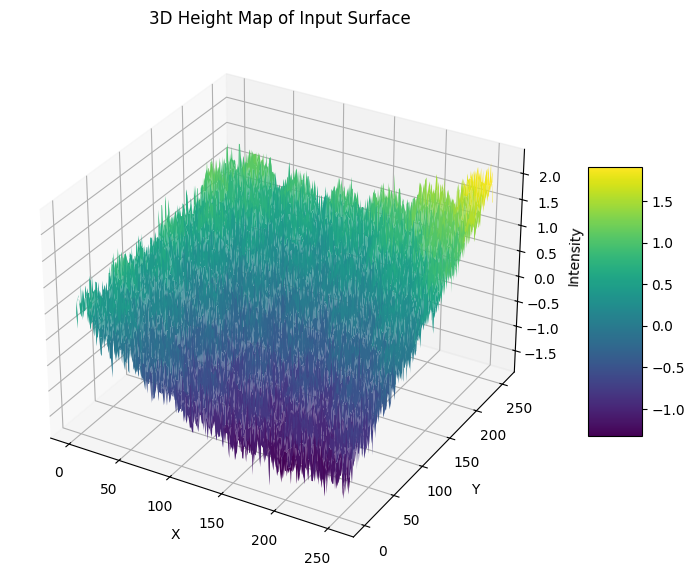

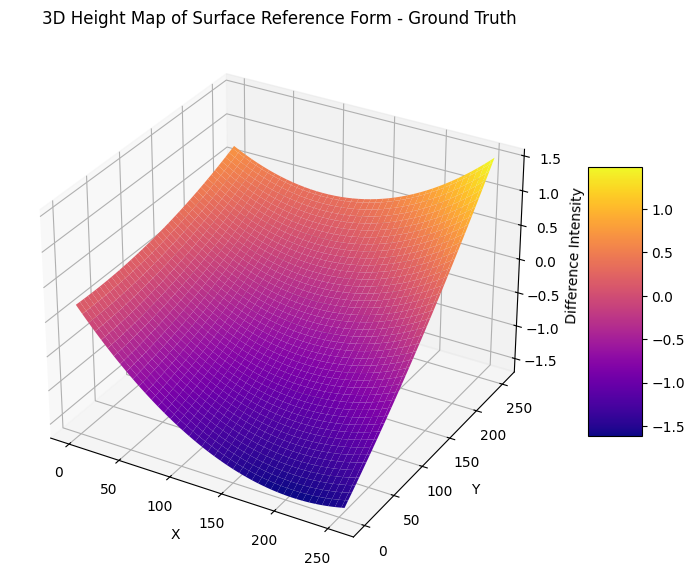

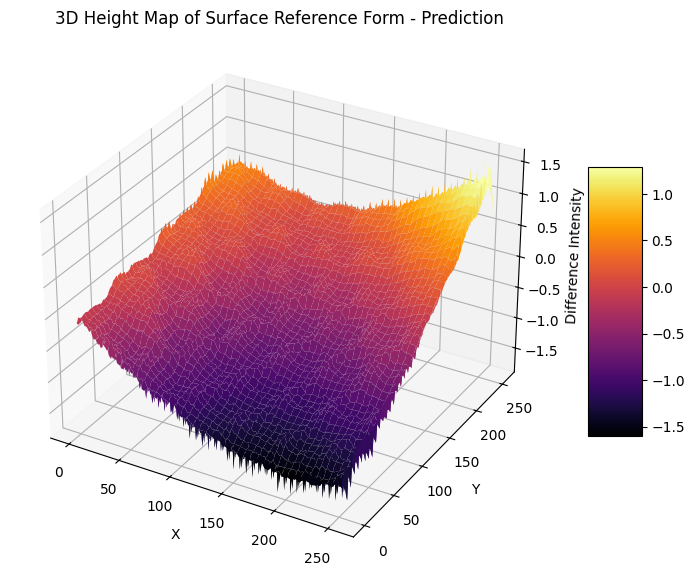

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from google.colab import files

Y_pred = model.predict(data_test)

n = 21
image_matrix1 = data_test_noisy[n,:,:,0]
image_matrix2 = labels_test[n,:,:,0]
image_matrix3 = Y_pred[n,:,:,0]

# Create a meshgrid for the x and y coordinates
x = np.arange(image_matrix1.shape[1])
y = np.arange(image_matrix1.shape[0])
x, y = np.meshgrid(x, y)

# Create the first plot
fig1 = plt.figure(figsize=(10, 7))
ax1 = fig1.add_subplot(111, projection='3d')

# Plot the surface
surf1 = ax1.plot_surface(x, y, image_matrix1, cmap='viridis')
fig1.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Set labels and title
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Intensity')
ax1.set_title('3D Height Map of Input Surface')

# Create the second plot
fig2 = plt.figure(figsize=(10, 7))
ax2 = fig2.add_subplot(111, projection='3d')

# Plot the surface
surf2 = ax2.plot_surface(x, y, image_matrix2, cmap='plasma')
fig2.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

# Set labels and title
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Difference Intensity')
ax2.set_title('3D Height Map of Surface Reference Form - Ground Truth')

# Create the third plot
fig3 = plt.figure(figsize=(10, 7))
ax3 = fig3.add_subplot(111, projection='3d')

# Plot the surface
surf3 = ax3.plot_surface(x, y, image_matrix3, cmap='inferno')
fig3.colorbar(surf3, ax=ax3, shrink=0.5, aspect=5)

# Set labels and title
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Difference Intensity')
ax3.set_title('3D Height Map of Surface Reference Form - Prediction')

# Show all plots
plt.show()

# Save the first figure
# fig1.savefig('3D_Height_Map_of_Image.png')
# Save the second figure
# fig2.savefig('3D_Difference_Map_Image_vs_Ground_Truth.png')
# Save the third figure
# fig3.savefig('3D_Difference_Map_Image_vs_Prediction.png')

In [ ]:
im1 = pd.DataFrame(image_matrix1)
im2 = pd.DataFrame(image_matrix2)
im3 = pd.DataFrame(image_matrix3)
name1 = 'Xtest' + str(n) + '.xlsx'
name2 = 'Ytest' + str(n) + '.xlsx'
name3 = 'Ypred' + str(n) + '.xlsx'
im1.to_excel(name1, index=False, header=False)
im2.to_excel(name2, index=False, header=False)
im3.to_excel(name3, index=False, header=False)
# Download the Excel files
files.download(name1)
files.download(name2)
files.download(name3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import os
from datetime import datetime

# Custom GaussianBlur Layer
class GaussianBlurLayer(layers.Layer):
    def __init__(self, kernel_size, sigma, **kwargs):
        super(GaussianBlurLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.sigma = sigma

    def build(self, input_shape):
        kernel_size = self.kernel_size
        sigma = self.sigma

        # Create a 2D Gaussian kernel
        def gaussian_kernel(size, sigma):
            x = tf.range(-size, size + 1, dtype=tf.float32)
            x = tf.exp(-0.5 * (x / sigma) ** 2)
            kernel = x[:, None] * x[None, :]
            kernel = kernel / tf.reduce_sum(kernel)
            return kernel[:, :, tf.newaxis, tf.newaxis]

        gaussian_kernel = gaussian_kernel(self.kernel_size // 2, self.sigma)
        gaussian_kernel = tf.tile(gaussian_kernel, [1, 1, input_shape[-1], 1])
        self.gaussian_kernel = tf.constant(gaussian_kernel, name='gaussian_kernel')

    def call(self, inputs):
        return tf.nn.depthwise_conv2d(inputs, self.gaussian_kernel, strides=[1, 1, 1, 1], padding='SAME')

def sse_loss_with_tv(lambda_tv):

    def loss(y_true, y_pred):
        # Ensure inputs are float32
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)

        # Calculate residuals
        r = y_true - y_pred
        abs_r = tf.abs(r)
        sse = tf.reduce_sum(tf.square(r))

        # Calculate total variation (TV) penalty
        tv_penalty = lambda_tv * tf.reduce_sum(tf.image.total_variation(y_pred))

        # Total loss with TV penalty
        total_loss = sse + tv_penalty

        return total_loss

    return loss


# Specify the path to the saved model
base_directory = '/content/drive/My Drive/saved_models/my_model'
model_filename = 'my_model_2024-11-02_17-05-23.h5'
model_directory = os.path.join(base_directory, model_filename)

# Load the model using custom_objects
custom_objects = {
    'GaussianBlurLayer': GaussianBlurLayer,
    'loss': sse_loss_with_tv(lambda_tv=2e-5)
}
model = tf.keras.models.load_model(model_directory, custom_objects=custom_objects)

print(f"Model loaded successfully from {model_directory}.")

# Evaluate or Predict
start_time = time.time()
Y_pred = model.predict(data_test)
end_time = time.time()
print(f"Prediction time: {end_time - start_time:.2f} seconds")

# Directly evaluate model if labels are available
if 'labels_test' in globals():  # Checks if labels_test exists
    test_results = model.evaluate(data_test, labels_test)
    print(f"Test Loss: {test_results[0]}, Test MSE: {test_results[1]}, Test MAE: {test_results[2]}")

Model loaded successfully from /content/drive/My Drive/saved_models/my_model/my_model_2024-11-02_17-05-23.h5.
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step
Prediction time: 1.91 seconds
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - loss: 189202.6094 - mean_absolute_error: 0.2276 - mean_squared_error: 0.0902
Test Loss: 180812.828125, Test MSE: 0.08621789515018463, Test MAE: 0.22243261337280273
